# Learning Curve

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv= None, 
                       n_jobs= 1, train_sizes= np.linspace(.1, 1.0, 5)):
    
    plt.figure(figsize=(10,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, n_jobs= n_jobs, train_sizes= train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis= 1)
    
    test_scores_mean = np.mean(test_scores, axis= 1)
    test_scores_std = np.std(test_scores, axis= 1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha = 0.1, 
                     color = 'r')
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha = 0.1,
                    color = 'g')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color= 'r',
             label = "Training Score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color= 'g',
             label = 'Cross-Validation Score')
    
    plt.legend(loc= 'best')
    
    return plt

In [5]:
# loading boston dataset 
boston = load_boston()

<module 'matplotlib.pyplot' from 'C:\\Users\\SURFACE\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

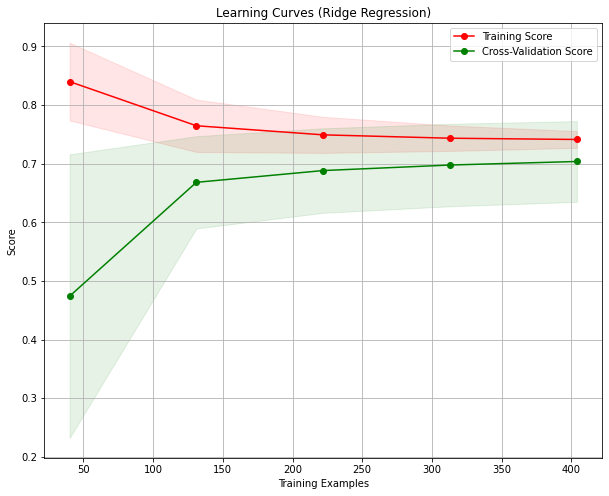

In [6]:
X, y = boston.data, boston.target

title = "Learning Curves (Ridge Regression)"

cv = ShuffleSplit(n_splits= 100, test_size= 0.2, random_state= 0)
estimator = Ridge()

plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs= 4)

# Validation Curve

In [13]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge

In [14]:
np.random.seed(0)

boston = load_boston()
X, y = boston.data, boston.target

indices = np.arange(y.shape[0])
# print(indices)
np.random.shuffle(indices)  # shuffle data randomly
# print(indices)

X, y = X[indices], y[indices]

param_name = 'alpha'
param_range = np.logspace(-5, 2, 10)

train_scores, valid_scores = validation_curve(Ridge(),
                                              X,
                                              y, 
                                              param_name, 
                                              param_range)

print("Trian scores: \n",train_scores)
print("Valid scors: \n",valid_scores)

train_mean = np.mean(train_scores, axis= 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(valid_scores, axis= 1)
test_std = np.std(valid_scores, axis= 1)


C:\Users\SURFACE\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-05 5.99484250e-05 3.59381366e-04 2.15443469e-03
 1.29154967e-02 7.74263683e-02 4.64158883e-01 2.78255940e+00
 1.66810054e+01 1.00000000e+02] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Trian scores: 
 [[0.77301356 0.72917058 0.74897081 0.75658611 0.70497483]
 [0.77301356 0.72917058 0.74897081 0.75658611 0.70497483]
 [0.77301356 0.72917058 0.74897081 0.75658611 0.70497483]
 [0.77301353 0.72917054 0.74897077 0.75658608 0.70497479]
 [0.77301247 0.72916919 0.74896965 0.756585   0.70497354]
 [0.77297842 0.72912518 0.74893331 0.75655037 0.70493287]
 [0.77228874 0.7281616  0.74817798 0.75582878 0.7040692 ]
 [0.76863902 0.72215205 0.74391411 0.75177776 0.6990457 ]
 [0.76406744 0.71459653 0.7375499  0.74641495 0.69322072]
 [0.75112197 0.70098401 0.71983959 0.72934545 0.68236377]]
Valid scors: 
 [[0.58922226 0.77799155 0.66791982 0.66801623 0.83953314]
 [0.58922165 0.77799206 0.66791997 0.66801588 0.83953301]
 [0.58921796 0.77799515 0.66792085 0.66801378 0.83953223]
 [0.58919587 0.77801364 0.66792606 0.66800121 0.83952755]
 [0.58906345 0.77812273 0.66795565 0.66792568 0.83949885]
 [0.58827374 0.77871876 0.66808144 0.66746987 0.83930713]
 [0.58399654 0.78090531 0.66788935 0.664

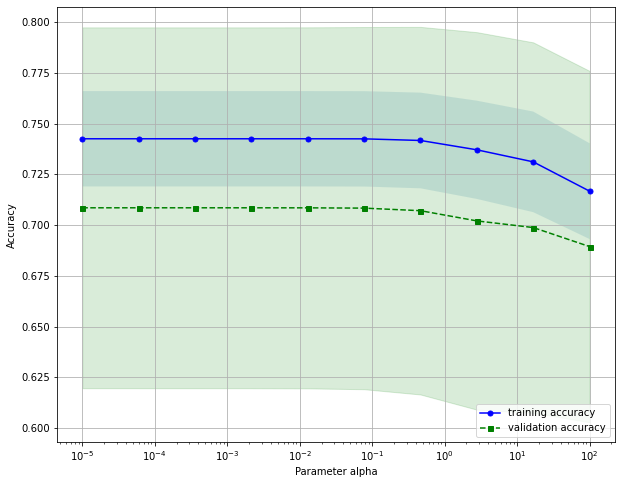

In [15]:
plt.figure(figsize= (10,8))
plt.plot(param_range, train_mean,
         color= 'blue', marker= 'o',
         markersize= 5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha= 0.15)

plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()